# Fashion MNIST Multinomial

Get the necessary files for the next session from https://www.kaggle.com/datasets/zalando-research/fashionmnist


## Preparing the data

In [1]:
#!pip install scikit-learn
#!pip install tensorflow==2.10
import pandas as pd
import numpy as np
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
print(tf.__version__)

2.10.0


In [2]:
#read data with pandas
dataTrain = pd.read_csv('data/fashion-mnist_train.csv')
dataTest = pd.read_csv('data/fashion-mnist_test.csv')

In [3]:
#convert to numpy and initialize variables for training
X_train, y_train = dataTrain.iloc[:, 1:].to_numpy(), dataTrain.iloc[:, 0].to_numpy()
X_test, y_test = dataTest.iloc[:, 1:].to_numpy(), dataTest.iloc[:, 0].to_numpy()

#Define Classnames
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# for tensorflow 2.10 we need Cuda 11.2 (tensorflow 2.11 seems not to work in )
# use the following code to hide the GPU
#import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Create the Network

In [15]:
model = Sequential()

model.add(Dense(100, activation="sigmoid", input_shape=(784,)))
# add suitable last layer here with number of neurons and proper activation function
model.add(Dense(10, activation="softmax"))
# we have to change from binary to categorial here because we have multiple classes for prediction
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"]) 


In [16]:
# show the that string values given here correspon to classes e.g tf.nn.softmax or 
print(model.layers[1].activation)
model.summary()

<function softmax at 0x000001BE33CA15A0>
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


# Prepare to train

In [17]:
y_one_hot = tf.one_hot(y_train,len(class_names))
print(y_one_hot)

tf.Tensor(
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]], shape=(60000, 10), dtype=float32)


In [11]:
# prepare ground truth as one-hot encoded values
y_one_hot = tf.one_hot(y_train,len(class_names))
y_one_hot_test = tf.one_hot(y_test,len(class_names))

In [12]:
#alternative 
print(tf.one_hot(y_train,len(class_names)))
tf.keras.utils.to_categorical(y_train, num_classes=len(class_names))

tf.Tensor(
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]], shape=(60000, 10), dtype=float32)


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [18]:
model.fit(
    X_train,
    y_one_hot,
    epochs=10,
    batch_size=100)

Epoch 1/10
600/600 [==============================] - 2s 4ms/step - loss: 1.0553 - accuracy: 0.6865
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: 0.7103 - accuracy: 0.7698
Epoch 3/10
600/600 [==============================] - 3s 6ms/step - loss: 0.6337 - accuracy: 0.7885
Epoch 4/10
600/600 [==============================] - 3s 6ms/step - loss: 0.5957 - accuracy: 0.7998
Epoch 5/10
600/600 [==============================] - 3s 6ms/step - loss: 0.5789 - accuracy: 0.8046
Epoch 6/10
600/600 [==============================] - 3s 6ms/step - loss: 0.5523 - accuracy: 0.8107
Epoch 7/10
600/600 [==============================] - 3s 6ms/step - loss: 0.5371 - accuracy: 0.8159
Epoch 8/10
600/600 [==============================] - 3s 6ms/step - loss: 0.5314 - accuracy: 0.8162
Epoch 9/10
600/600 [==============================] - 3s 6ms/step - loss: 0.5181 - accuracy: 0.8195
Epoch 10/10
600/600 [==============================] - 3s 6ms/step - loss: 0.5165 - accuracy: 0.8196

# Evaluate and use

In [22]:
model.evaluate(X_test, y_one_hot_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5150 - accuracy: 0.8219


[0.5150290131568909, 0.8219000101089478]

In [25]:
y_pred = model.predict(X_test)
print(f"Shape: {y_pred.shape}")
y_pred

np.round(y_pred[0:2,:]*100)

313/313 [==============================] - 1s 3ms/step
Shape: (10000, 10)


array([[65.,  0.,  1.,  3.,  1.,  0., 31.,  0.,  0.,  0.],
       [ 0., 99.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)

# Convert probalities to class 

In [30]:
# introducing argmax
pred = y_pred[1]
print(np.round(pred*100))
index1 = np.argmax(pred) 
print(f" The index of the largest element is {index1}")
print(f" The value of the largest element is {pred[index1]}")


[ 0. 99.  0.  1.  0.  0.  0.  0.  0.  0.]
 The index of the largest element is 1
 The value of the largest element is 0.9899780750274658


In [34]:
# argmax for the whole array
index = tf.argmax(y_pred, axis=1) # alternativ auch np.argmax()
index.shape
index

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([0, 1, 2, ..., 8, 8, 2], dtype=int64)>

In [35]:
from sklearn.metrics import accuracy_score   
score = accuracy_score(y_test, index)  
score

0.8219

# Why are we not as good as before ?
previously we had 95% accurracy

10% TShirts 90% Others

In [36]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(f"Precision: {precision_score(y_test, index, average='weighted')}")  
print(f"Recall: {recall_score(y_test, index, average='weighted')}")  


Precision: 0.8229583462381428
Recall: 0.8219


# What is beeing mixed up ?

## Creating a confusion matrix for better insight 

In [37]:
import pandas as pd

ytrue = pd.Series(y_test, name = 'actual')
ypred = pd.Series(index, name = 'pred')
pd.crosstab(ytrue, ypred)

pred,0,1,2,3,4,5,6,7,8,9
actual,,,,,,,,,,
0,802,7,12,70,8,1,85,0,15,0
1,6,941,21,22,2,1,7,0,0,0
2,20,1,678,5,200,0,84,0,12,0
3,31,19,9,858,50,0,29,0,4,0
4,1,1,56,23,800,0,117,0,2,0
5,1,1,0,2,0,876,0,52,14,54
6,178,4,92,39,154,0,514,0,18,1
7,0,0,0,0,0,29,0,875,3,93
8,3,0,13,8,10,3,14,5,943,1


The way we learned it last year:

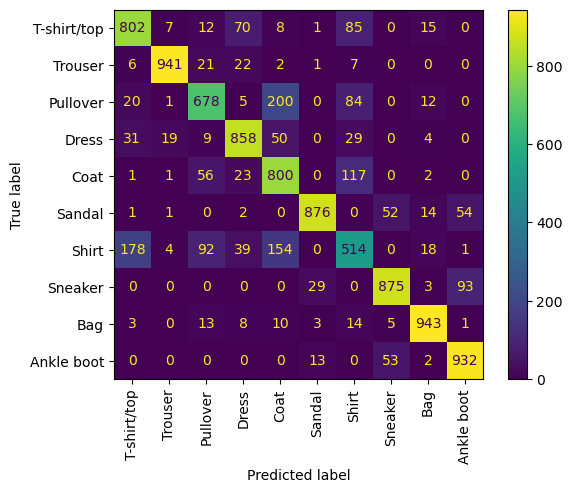

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test, index)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation='vertical')


# Exercises

* Try different activation functions in the first layer

* Try what happens if we use sigmoid for the last layer ? Does categorical-crossentropy work together with sigmoid as well ?

* Try what happens if we have a relu in the last layer + categorical_hinge ?

